In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### The Saver class 

- https://www.tensorflow.org/api_docs/python/tf/train/Saver
- adds ops to `save` and `restore` variables to and from checkpoints. It also provides convenience methods to run these ops.

- Checkpoints are `binary` files in a proprietary format which map variable names to tensor values. The best way to examine the contents of a checkpoint is to load it using a Saver.

- Savers can automatically number `checkpoint` filenames with a provided counter. This lets you keep multiple checkpoints at different steps while training a model. 

*** - For example you can number the checkpoint filenames with the training step number. To avoid filling up disks, savers manage checkpoint files automatically. For example, they can keep only the N most recent files, or one checkpoint for every N hours of training. ***

- You number checkpoint filenames by passing a value to the optional global_step argument to save()

### example 1

In [32]:
# save model 
# https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model

w1 = tf.Variable(tf.truncated_normal(shape=[10]), name='w1')
w2 = tf.Variable(tf.truncated_normal(shape=[20]), name='w2')
tf.add_to_collection('vars', w1)
tf.add_to_collection('vars', w2)
saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver.save(sess, 'my-model')
# `save` method will call `export_meta_graph` implicitly.
# you will get saved graph files:my-model.meta

'my-model'

In [33]:
ls my-model*

my-model.data-00000-of-00001  my-model.meta
my-model.index


In [34]:
# load model 

sess = tf.Session()
new_saver = tf.train.import_meta_graph('my-model.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./'))
all_vars = tf.get_collection('vars')
for v in all_vars:
    v_ = sess.run(v)
    print(v_)

INFO:tensorflow:Restoring parameters from ./my-model
[ 0.22968575  1.31711602 -0.82059711  0.17073184  0.9097057   0.50959098
  0.31685209  1.18070495 -0.2815063  -1.85898638]
[-0.62696666  0.32646573 -1.05747974 -0.17746687 -0.03896166  1.01411533
  0.65188581 -0.15104343  1.9141686  -0.19892734 -0.78146136 -1.45895588
  0.25194064 -1.10512221 -1.08115661 -0.52099758  0.127322   -0.28687054
  0.01979428 -0.41452011]
[ 1.90995538  0.4603152   0.79823208  0.57112527  0.89465123  0.28010964
 -1.13043547 -0.89993548 -1.94309115  1.07728612]
[-0.9043119  -0.79303306  0.26583636 -0.827254   -1.013919    1.38673484
  1.33524203 -0.24269348  0.10440218 -0.8742708   0.56429553 -1.80272973
 -1.54065299 -1.30645001  1.94204807  1.16125429 -0.13856389 -0.57423121
  0.07957201  1.11878109]
[ 0.22968575  1.31711602 -0.82059711  0.17073184  0.9097057   0.50959098
  0.31685209  1.18070495 -0.2815063  -1.85898638]
[-0.62696666  0.32646573 -1.05747974 -0.17746687 -0.03896166  1.01411533
  0.65188581 -0

### example 2 

In [4]:
# credit 
# https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/303_save_reload.py


def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(100):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})

    saver.save(sess, 'params', write_meta_graph=False)  # meta_graph is not recommended

    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})


def reload():
    print('This is reload')
    # build entire net again and restore
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    saver = tf.train.Saver()  # define a saver for saving and restoring
    saver.restore(sess, 'params')

    # plotting
    pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()

In [15]:
#reload()

#saver

In [12]:
#noise

save()

This is save


This is save
This is reload
INFO:tensorflow:Restoring parameters from params


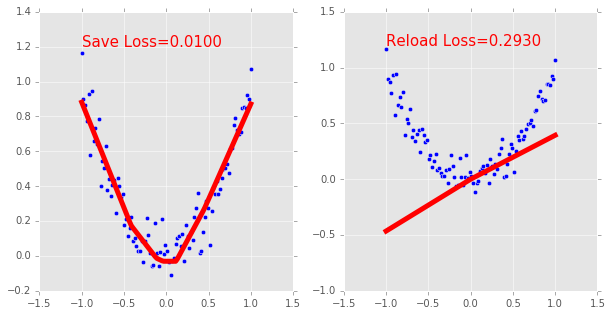

In [20]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise


save()

# destroy previous net
tf.reset_default_graph()

reload()